# Setup

In [1]:
%matplotlib inline
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from pathlib import Path
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder

Load Data

In [2]:
DATA = Path('/kaggle/input/tmdb-box-office-prediction')
list(DATA.iterdir())

[PosixPath('/kaggle/input/tmdb-box-office-prediction/sample_submission.csv'),
 PosixPath('/kaggle/input/tmdb-box-office-prediction/train.csv'),
 PosixPath('/kaggle/input/tmdb-box-office-prediction/test.csv')]

In [3]:
train = pd.read_csv(DATA/'train.csv')
test = pd.read_csv(DATA/'test.csv')
sampleSubmission = pd.read_csv(DATA/'sample_submission.csv')

# Inspect Data

In [4]:
train.head(10)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [6]:
train.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,...,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,...,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt2637294,en,Joshua,"When Lou, who has become the ""father of the In...",NaN,...,9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,The Magnificent Seven,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,...,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,...,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,...,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,...,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,...,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,...,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


<AxesSubplot:>

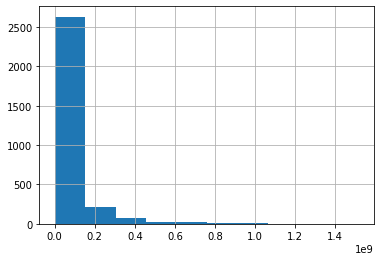

In [7]:
train.revenue.hist()

In [8]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

# Explore data

First numeric value correlation

In [10]:
corr_matrix = train.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue       1.000000
budget        0.752965
popularity    0.461460
runtime       0.216380
id            0.000610
Name: revenue, dtype: float64

Strong correlation between revenue and budget, also fairly strong between revenue and popularity. Somewhat between runtime and revenue. These numeric value correlations seem to be very important for predicting revenue and should definetly be included in the ML model.

There are also a lot of non numeric data that could strongly correlate to revenue. First looking at a few:
1. genres
2. language
3. release date

In [11]:
train[["genres"]].head(10)

,genres
0,"[{'id': 35, 'name': 'Comedy'}]"
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
2,"[{'id': 18, 'name': 'Drama'}]"
3,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n..."
4,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."
5,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '..."
6,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam..."
7,"[{'id': 99, 'name': 'Documentary'}]"
8,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam..."
9,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '..."


In [12]:
one_hot = pd.get_dummies(train["genres"])
train = train.join(one_hot)

In [13]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,"[{'id': 99, 'name': 'Documentary'}, {'id': 10769, 'name': 'Foreign'}]","[{'id': 99, 'name': 'Documentary'}, {'id': 18, 'name': 'Drama'}, {'id': 10402, 'name': 'Music'}, {'id': 10749, 'name': 'Romance'}]","[{'id': 99, 'name': 'Documentary'}, {'id': 18, 'name': 'Drama'}, {'id': 10402, 'name': 'Music'}, {'id': 53, 'name': 'Thriller'}]","[{'id': 99, 'name': 'Documentary'}, {'id': 18, 'name': 'Drama'}, {'id': 10402, 'name': 'Music'}]","[{'id': 99, 'name': 'Documentary'}, {'id': 18, 'name': 'Drama'}]","[{'id': 99, 'name': 'Documentary'}, {'id': 27, 'name': 'Horror'}]","[{'id': 99, 'name': 'Documentary'}, {'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}]","[{'id': 99, 'name': 'Documentary'}, {'id': 36, 'name': 'History'}]","[{'id': 99, 'name': 'Documentary'}, {'id': 80, 'name': 'Crime'}]","[{'id': 99, 'name': 'Documentary'}]"
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0,0,0,0,0,0,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0,0,0,0,0,0,0,0,0,0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0,0,0,0,0,0,0,0,0,0
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0,0,0,0,0,0,0,0,0,0


In [14]:
corr_matrix = train.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue                                                                                           1.000000
budget                                                                                            0.752965
popularity                                                                                        0.461460
[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}]    0.224326
runtime                                                                                           0.216380
                                                                                                    ...   
[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}]                                       -0.038270
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}]                                      -0.048042
[{'id': 99, 'name': 'Documentary'}]                                                              -0.055960
[{'id': 18, 'name': 'Drama'}, {'id': 

Every genre has a very weak correlation, therefore not exploring this data any deeper. Reset train dataframe

In [15]:
train = pd.read_csv(DATA/'train.csv')

Exploring language

In [16]:
train[["original_language"]].head()

,original_language
0,en
1,en
2,en
3,hi
4,ko


In [17]:
one_hot = pd.get_dummies(train["original_language"])
train = train.join(one_hot, on="id", how='left', lsuffix='_left', rsuffix='_right')

In [18]:
train.head()

,id_left,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,ro,ru,sr,sv,ta,te,tr,ur,vi,zh
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
corr_matrix = train.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue       1.000000
budget        0.752965
popularity    0.461460
runtime       0.216380
sr            0.038730
fr            0.037160
mr            0.032306
ml            0.028106
da            0.019845
ru            0.009843
en            0.006367
bn            0.004840
hi            0.004472
ro            0.003457
vi            0.002913
id_left       0.000610
pt            0.000409
de            0.000195
ur           -0.001052
it           -0.003250
fa           -0.003464
nl           -0.003979
sv           -0.004288
ja           -0.005078
he           -0.006057
el           -0.007605
cs           -0.007762
ar           -0.007785
tr           -0.007963
nb           -0.008458
pl           -0.008468
fi           -0.008770
id_right     -0.008808
no           -0.009547
ko           -0.010790
te           -0.011490
hu           -0.014510
ta           -0.016646
es           -0.020364
zh           -0.025804
cn           -0.030720
Name: revenue, dtype: float64

Original language correlation

In [20]:
corr_matrix = train.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue       1.000000
budget        0.752965
popularity    0.461460
runtime       0.216380
sr            0.038730
fr            0.037160
mr            0.032306
ml            0.028106
da            0.019845
ru            0.009843
en            0.006367
bn            0.004840
hi            0.004472
ro            0.003457
vi            0.002913
id_left       0.000610
pt            0.000409
de            0.000195
ur           -0.001052
it           -0.003250
fa           -0.003464
nl           -0.003979
sv           -0.004288
ja           -0.005078
he           -0.006057
el           -0.007605
cs           -0.007762
ar           -0.007785
tr           -0.007963
nb           -0.008458
pl           -0.008468
fi           -0.008770
id_right     -0.008808
no           -0.009547
ko           -0.010790
te           -0.011490
hu           -0.014510
ta           -0.016646
es           -0.020364
zh           -0.025804
cn           -0.030720
Name: revenue, dtype: float64

Exploring if only english or not has correlation

In [21]:
train = pd.read_csv(DATA/'train.csv')

In [22]:
train['is_english'] = np.where(train['original_language']=='en', 1, 0)

In [23]:
corr_matrix = train.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue       1.000000
budget        0.752965
popularity    0.461460
runtime       0.216380
is_english    0.142130
id            0.000610
Name: revenue, dtype: float64

All languages seem to have no significant correlation to revenue. However, if it is in english or not has a much stronger correlation.

Exploring release date

In [24]:
train[["release_date"]].head()

,release_date
0,2/20/15
1,8/6/04
2,10/10/14
3,3/9/12
4,2/5/09


In [25]:
train['year'] = pd.DatetimeIndex(train['release_date']).year

Restricting release_date to only year in "year" column, to see if recent or old film has correlation to revenue. 

In [26]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,is_english,year
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,2015
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,2004
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,2014
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,2012
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,2009


In [27]:
corr_matrix = train.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue       1.000000
budget        0.752965
popularity    0.461460
runtime       0.216380
is_english    0.142130
year          0.008273
id            0.000610
Name: revenue, dtype: float64

Release year seems to not have a strong correlation to revenue.

Combination: budget/runtime to see if the relationship between a films budget and runtime is correlated to revenue. Also popularity/runtime and budget/popularity to check more combinations.

In [28]:
train["budget_per_runtime"] = train["budget"]/train["runtime"]
train["popularity_per_runtime"] = train["popularity"]/train["runtime"]
train["budget_per_popularity"] = train["budget"]/train["popularity"]
corr_matrix = train.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue                   1.000000
budget                    0.752965
budget_per_runtime        0.712007
popularity                0.461460
popularity_per_runtime    0.429610
runtime                   0.216380
budget_per_popularity     0.175036
is_english                0.142130
year                      0.008273
id                        0.000610
Name: revenue, dtype: float64

Result of this is a strong correlation that should be included in the ML model for predictions.

# Prepare data

Dropping data not beeing used

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3000 non-null   int64  
 1   belongs_to_collection   604 non-null    object 
 2   budget                  3000 non-null   int64  
 3   genres                  2993 non-null   object 
 4   homepage                946 non-null    object 
 5   imdb_id                 3000 non-null   object 
 6   original_language       3000 non-null   object 
 7   original_title          3000 non-null   object 
 8   overview                2992 non-null   object 
 9   popularity              3000 non-null   float64
 10  poster_path             2999 non-null   object 
 11  production_companies    2844 non-null   object 
 12  production_countries    2945 non-null   object 
 13  release_date            3000 non-null   object 
 14  runtime                 2998 non-null   

In [30]:
train['budget'].replace(to_replace = 0, value = 1, inplace=True)

In [31]:
train.dropna()
film = train.drop("revenue", axis=1)
film_2 = train._get_numeric_data()
film_2 = film_2[np.isfinite(film_2).all(1)]

film_labels = film_2["revenue"].copy()

film_num = film._get_numeric_data()
film_num = film_num[np.isfinite(film_num).all(1)]

In [32]:
film_labels.head

<bound method NDFrame.head of 0        12314651
1        95149435
2        13092000
3        16000000
4         3923970
          ...    
2995      1596687
2996       180590
2997     89456761
2998    171963386
2999     82087155
Name: revenue, Length: 2986, dtype: int64>

In [33]:
film_num.count()

id                        2986
budget                    2986
popularity                2986
runtime                   2986
is_english                2986
year                      2986
budget_per_runtime        2986
popularity_per_runtime    2986
budget_per_popularity     2986
dtype: int64

Dealing with missing values using sklearn SimpleImputer class

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

film_num['budget'] = film_num['budget'].astype(float)
train['budget'] = train['budget'].astype(float)
film_num.info()
train.info()
imputer.fit(film_num)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2986 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2986 non-null   int64  
 1   budget                  2986 non-null   float64
 2   popularity              2986 non-null   float64
 3   runtime                 2986 non-null   float64
 4   is_english              2986 non-null   int64  
 5   year                    2986 non-null   int64  
 6   budget_per_runtime      2986 non-null   float64
 7   popularity_per_runtime  2986 non-null   float64
 8   budget_per_popularity   2986 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 233.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3000 non-null   i

SimpleImputer(strategy='median')

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin
budget_ix, popularity_ix, runtime_ix = 1, 2, 3
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
 def __init__(self, add_budget_per_runtime = True): # no *args or **kargs
     self.add_budget_per_runtime = add_budget_per_runtime
 def fit(self, X, y=None):
     return self # nothing else to do
 def transform(self, X, y=None):
     budget_per_popularity = X[:, budget_ix] / X[:, popularity_ix]
     popularity_per_budget = X[:, popularity_ix] / X[:, budget_ix]
     if self.add_budget_per_runtime:
         budget_per_runtime = X[:, budget_ix] / X[:, runtime_ix]
         return np.c_[X, popularity_per_budget, budget_per_popularity,
                 budget_per_runtime]
     else:
         return np.c_[X, popularity_per_budget, budget_per_popularity]
        
        
attr_adder = CombinedAttributesAdder(add_budget_per_runtime=False)
train_extra_attribs = attr_adder.transform(film_num.values)

Transformer where hyperparameters can be added to help the ML algorithm.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy="median")),
     ('attribs_adder', CombinedAttributesAdder()),
     ('std_scaler', StandardScaler()),
    ])
film_num_tr = num_pipeline.fit_transform(film_num)

Numeric pipeline from sklearn to help handle numeric data.

In [37]:
from sklearn.compose import ColumnTransformer

num_attribs = list(film_num)
cat_attribs = ["is_english"]
full_pipeline = ColumnTransformer([
     ("num", num_pipeline, num_attribs),
     ("cat", OneHotEncoder(), cat_attribs),
   ])
film_prepared = full_pipeline.fit_transform(film_num)

Combining numeric data and categorical data with full pipeline resulting in data transformation that can be used by ML models.

# Training

Trying different models and comparing their results with scores.

Linear regression

In [38]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(film_prepared, film_labels)

LinearRegression()

In [39]:
from sklearn.metrics import mean_squared_error
rev_predictions = lin_reg.predict(film_prepared)
lin_mse = mean_squared_error(film_labels, rev_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

84477149.87298246

Decision tree regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(film_prepared, film_labels)

DecisionTreeRegressor()

In [41]:
film_predictions = tree_reg.predict(film_prepared)
tree_mse = mean_squared_error(film_labels, film_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Getting scores

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, film_prepared, film_labels,
 scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [43]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [1.17788803e+08 1.19315014e+08 1.23972242e+08 1.10023452e+08
 1.26589297e+08 1.24018844e+08 8.69458492e+07 1.33260041e+08
 1.07781780e+08 1.25025143e+08]
Mean: 117472046.49422503
Standard deviation: 12487096.537723737


In [44]:
lin_scores = cross_val_score(lin_reg, film_prepared, film_labels,
        scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [1.17788803e+08 1.19315014e+08 1.23972242e+08 1.10023452e+08
 1.26589297e+08 1.24018844e+08 8.69458492e+07 1.33260041e+08
 1.07781780e+08 1.25025143e+08]
Mean: 117472046.49422503
Standard deviation: 12487096.537723737


Random forest regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(film_prepared, film_labels)

forest_mse = mean_squared_error(film_labels, film_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

forest_rmse_scores = np.sqrt(-lin_scores)
display_scores(forest_rmse_scores)

Scores: [8.60432418e+07 9.10574623e+07 9.54115100e+07 8.14606180e+07
 8.31965378e+07 9.85693584e+07 7.05520184e+07 8.23601271e+07
 1.09458065e+08 7.85332257e+07]
Mean: 87664216.46047755
Standard deviation: 10634080.433577735


Random forest regressor has the best score

# Tuning

Grid search

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = [
     {'n_estimators': [70, 75, 80], 'max_features': [1, 2, 3, 4]},
     {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
     ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
     scoring='neg_mean_squared_error',
     return_train_score=True)
grid_search.fit(film_prepared, film_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [1, 2, 3, 4],
                          'n_estimators': [70, 75, 80]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 80}

In [48]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=80)

Using grid search to find good combinations of hyperparameters. Using .best_params to find best parameters of the grid search above. Taking these forward and trying new, repeat. Found best_params to be max_features=3, n_estimators=75 after multiple irerations.

In [49]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

85943160.02013767 {'max_features': 1, 'n_estimators': 70}
84918014.67272066 {'max_features': 1, 'n_estimators': 75}
84547884.19099379 {'max_features': 1, 'n_estimators': 80}
82785353.82382981 {'max_features': 2, 'n_estimators': 70}
84057993.51046523 {'max_features': 2, 'n_estimators': 75}
81418393.60208242 {'max_features': 2, 'n_estimators': 80}
83590090.63171811 {'max_features': 3, 'n_estimators': 70}
83918082.84733918 {'max_features': 3, 'n_estimators': 75}
82685904.96294448 {'max_features': 3, 'n_estimators': 80}
83089491.16478792 {'max_features': 4, 'n_estimators': 70}
84067094.85385796 {'max_features': 4, 'n_estimators': 75}
82965039.9075084 {'max_features': 4, 'n_estimators': 80}
96856310.80146423 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
92080974.25031684 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
101169125.64561121 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
90928538.8971648 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [50]:
test["budget_per_runtime"] = test["budget"]/test["runtime"]
test["popularity_per_runtime"] = test["popularity"]/test["runtime"]
test["budget_per_popularity"] = test["budget"]/test["popularity"]
test['year'] = pd.DatetimeIndex(test['release_date']).year
test['is_english'] = np.where(test['original_language']=='en', 1, 0)
test['budget'].replace(to_replace = 0, value = 1, inplace=True)
test_num = test._get_numeric_data()
test_num = test_num[np.isfinite(test_num).all(1)]

Formating the test dataframe the same way train was handled before. Fitting it into a final model for prediction.

In [51]:
final_model = grid_search.best_estimator_
test_prepared = full_pipeline.transform(test_num)
final_predictions = final_model.predict(test_prepared)

# Submission

In [52]:
y_pred = final_model.predict(test_prepared)
y_pred[:10]
len(y_pred), len(test)

(4384, 4398)

In [53]:
submission = pd.DataFrame({'id': test_num.id, 'revenue': y_pred})

In [54]:
submission.head()

,id,revenue
0,3001,7.618692e+06
1,3002,5.261959e+06
2,3003,1.444742e+07
3,3004,2.425622e+07
4,3005,1.055810e+07


In [55]:
submission.to_csv('submission.csv', index=False)